In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

# replacing the blank with o as tenure is o and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" " ,"0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe ()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df["customerID"].duplicated ().sum()

0

In [12]:
def conv(value):
    if value == 1:
       return "yes"
    else:
       return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

# converted 0 and 1 values of senior citizen yes/no to make it easier to understand

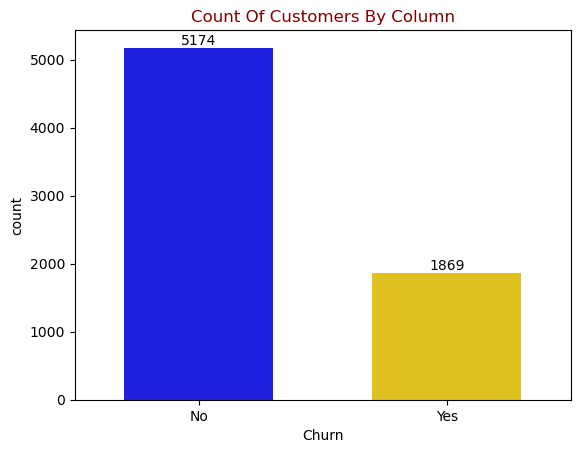

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x='Churn', data=df, hue='Churn', palette=['blue', 'gold'], width=0.6)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title("Count Of Customers By Column",color="maroon")
plt.show()


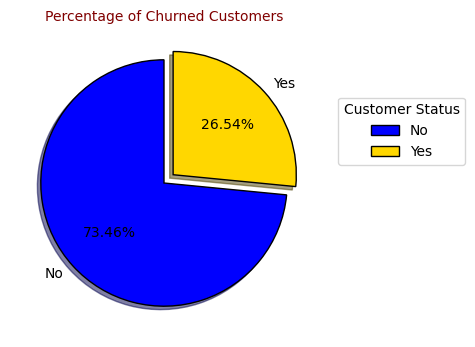

In [143]:
plt.figure(figsize=(5, 4))
gb = df.groupby("Churn").agg({'Churn': 'count'})
Explode = [0, 0.1]
colors = ['blue', 'gold']
plt.pie(
    gb['Churn'], 
    labels=gb.index, 
    autopct='%1.2f%%', 
    explode=Explode, 
    colors=colors,
    shadow=True,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title(f"Percentage of Churned Customers ({churn_percentage:.2f}%)", fontsize=10,color="maroon")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.legend(title="Customer Status", loc="upper right", bbox_to_anchor=(1.5, 0.8))

plt.show()


# from the given pie chart we can conclude that 26.54% of our customers have churned out. # not let's explore the reason behind it

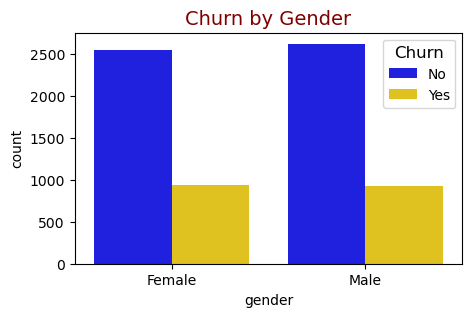

In [144]:
plt.figure(figsize = (5,3))
sns.countplot(x = "gender", data = df, hue = "Churn", palette=['blue', 'gold'])
color = ["red","blue"]
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.title("Churn by Gender",fontsize=14,color="maroon")
plt.legend(title="Churn",loc="upper right",fontsize=10,title_fontsize=12)
plt.show()

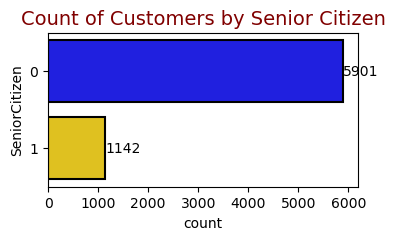

In [147]:
plt.figure(figsize=(4, 2))
ax = sns.countplot(y="SeniorCitizen", data=df, hue="SeniorCitizen", palette=["blue", "gold"], legend=False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', fontsize=10)
for p in ax.patches:
    p.set_edgecolor('black')  
    p.set_linewidth(1.5)      

plt.title("Count of Customers by Senior Citizen", fontsize=14, color="maroon")

plt.show()


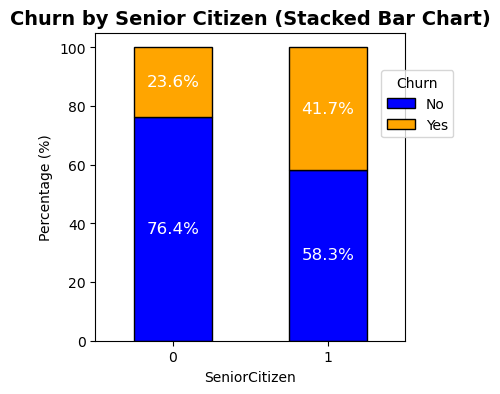

In [157]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

fig, ax = plt.subplots(figsize=(4, 4))  

total_counts.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'orange'],edgecolor='black') 

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center',color='white', fontsize=12)

plt.title('Churn by Senior Citizen (Stacked Bar Chart)', fontsize=14, fontweight='bold')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  

plt.show()

# comparative a greater pecentage of people in senior citizen category have churned

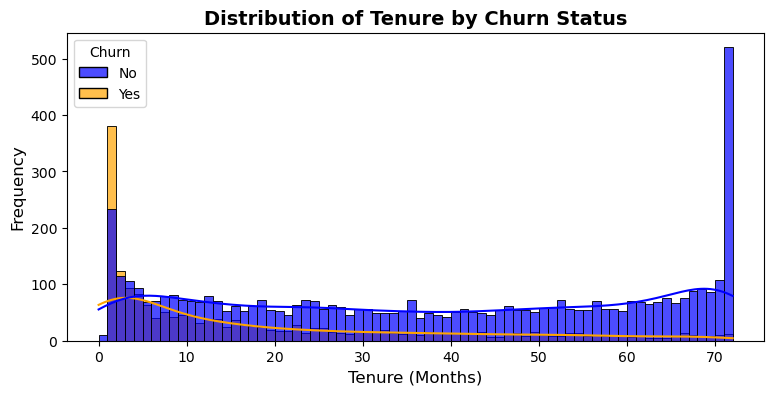

In [156]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn",palette=['blue','orange'],kde=True,alpha=0.7)
plt.title('Distribution of Tenure by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# people who have used our services for a long thime have stayed and people who have used our services #1 or 2 months have churned

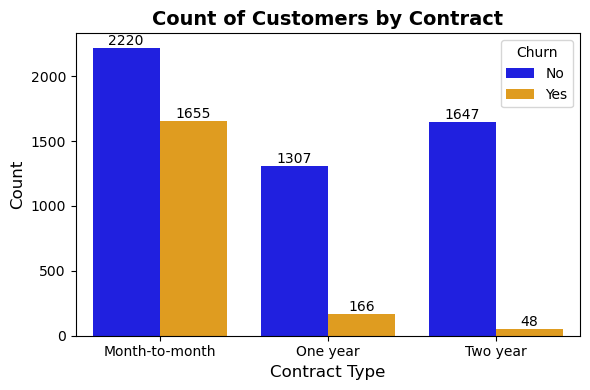

In [155]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Contract", data=df, hue="Churn", palette=['blue', 'orange'])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', color='black', fontsize=10)
plt.title("Count of Customers by Contract", fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract .

In [126]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

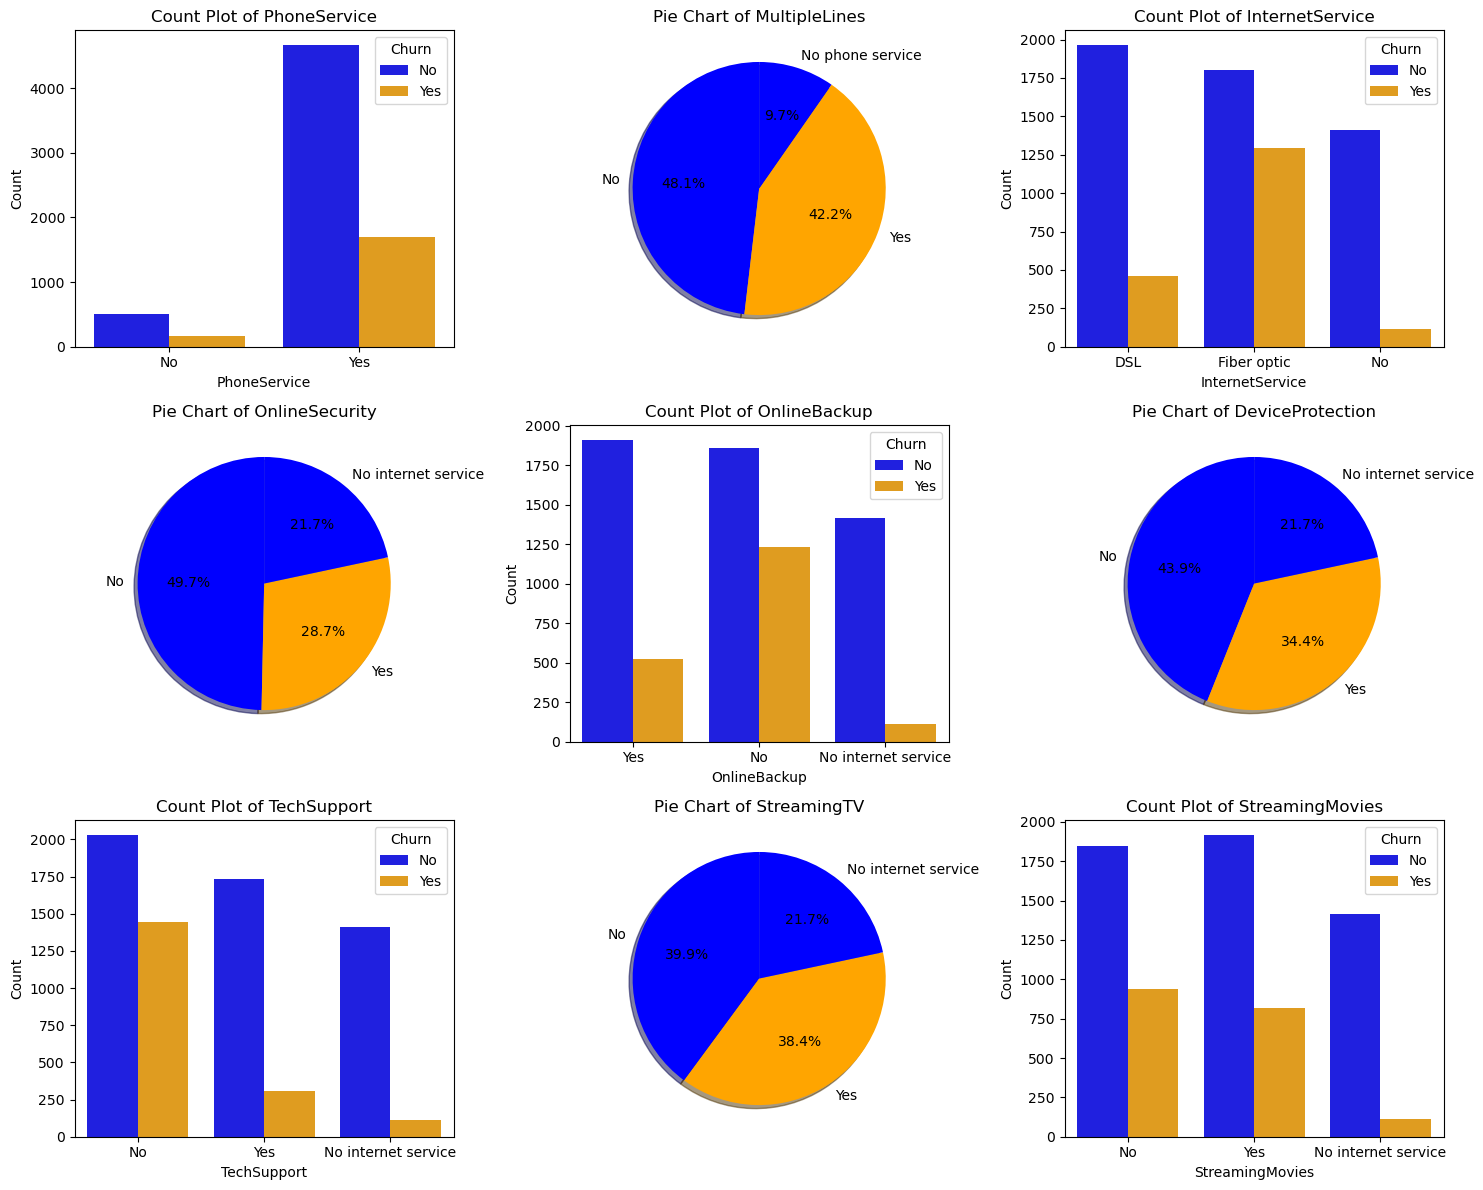

In [153]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  
axes = axes.flatten()
for i, col in enumerate(columns):
    if i % 2 == 0:  # Count plot
        sns.countplot(x=col, data=df, ax=axes[i], hue='Churn', palette=['blue', 'orange'])
        axes[i].set_title(f'Count Plot of {col}', fontsize=12)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Count', fontsize=10)
    else:  
        counts = df[col].value_counts()
        labels = counts.index
        sizes = counts.values
        colors = ['blue', 'orange'][:len(labels)] 
        axes[i].pie(
            sizes, 
            labels=labels, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=colors, 
            shadow=True, 
            textprops={'fontsize': 10}
        )
        axes[i].set_title(f'Pie Chart of {col}', fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


In [133]:
# The majority of customer who do not churn tend to have services like phoneServices,internet Services (perticilarly DSL)and onlineSecurity enabled.for
#services like onlinBackup, Techsupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable 

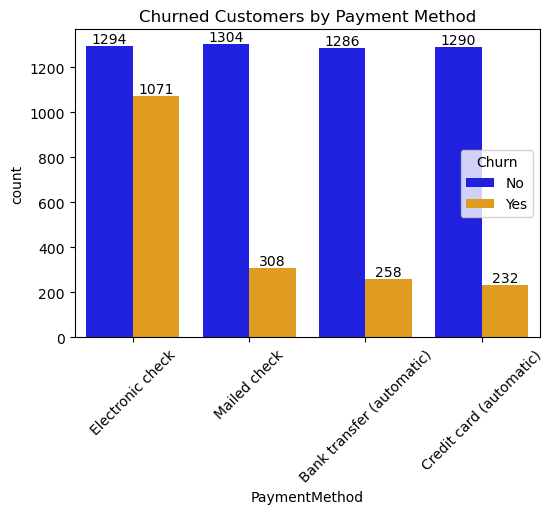

In [154]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn",palette=["blue", "orange"])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()